In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):  # ../../
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs, psf

In [5]:
ps_dir = os.path.join(data_dir, 'output', 'power_spectra')

In [6]:
num_lenses = len(glob(os.path.join(config.machine.dir_05, '*')))
images_list = []

for j in range(num_lenses):
    uid = str(j).zfill(8)
    images = [np.load(i) for i in sorted(glob(os.path.join(ps_dir, f'im_subs_*_{uid}.npy')))]
    images_list.append(images)

images_list = images_list[:100]

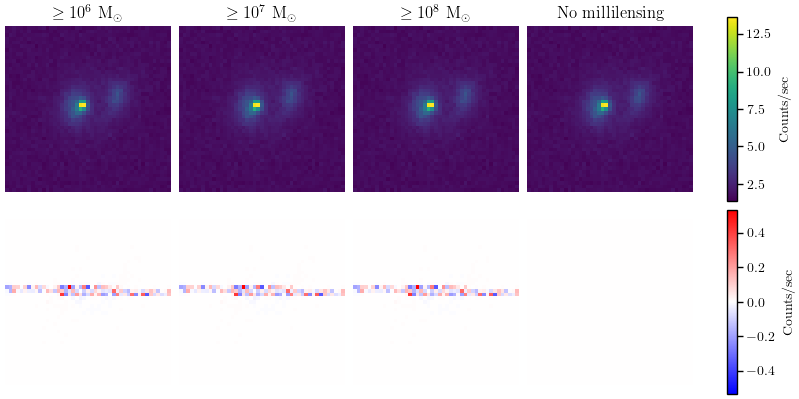

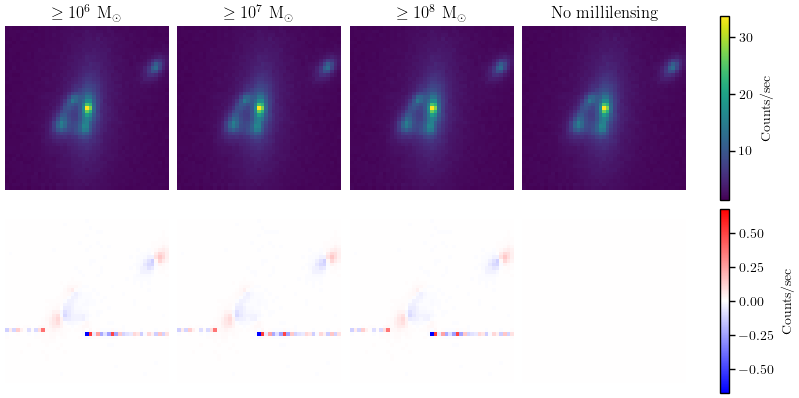

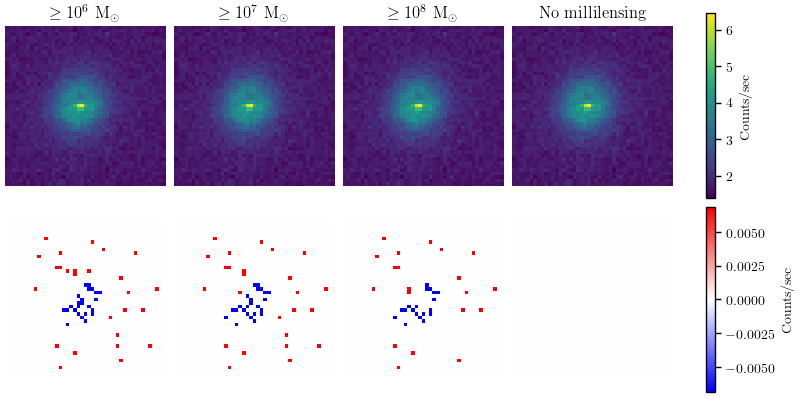

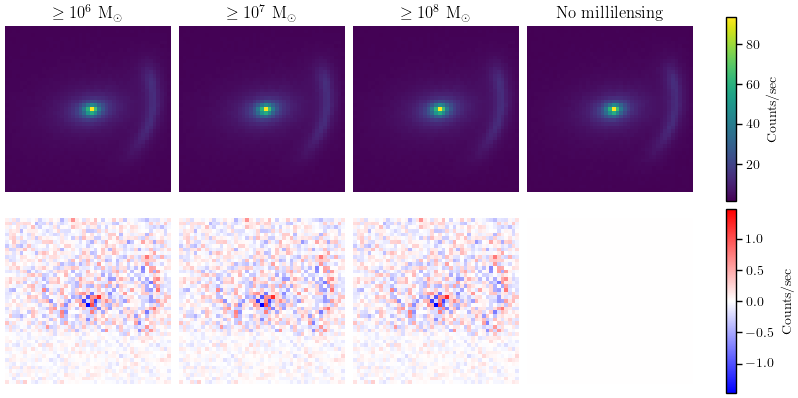

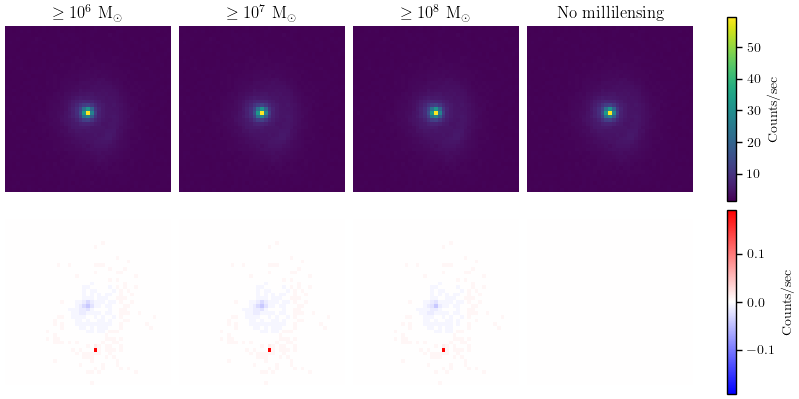

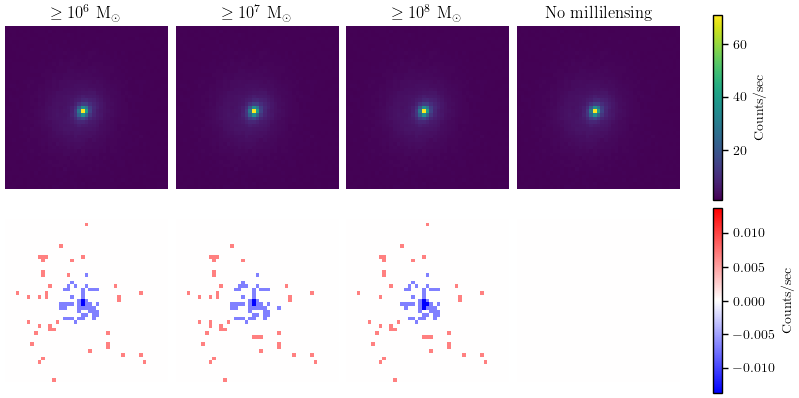

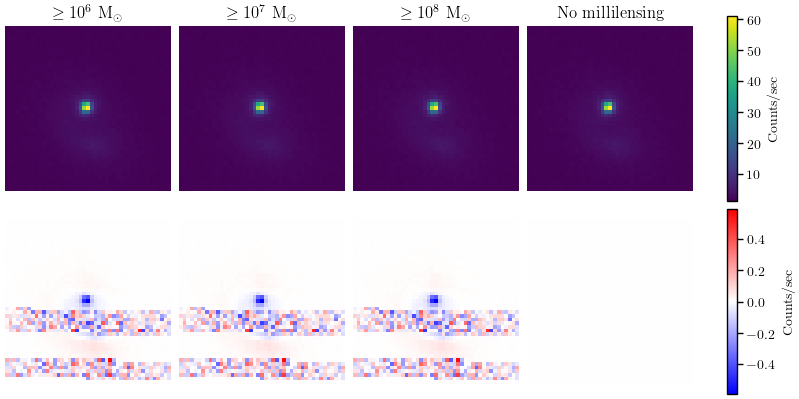

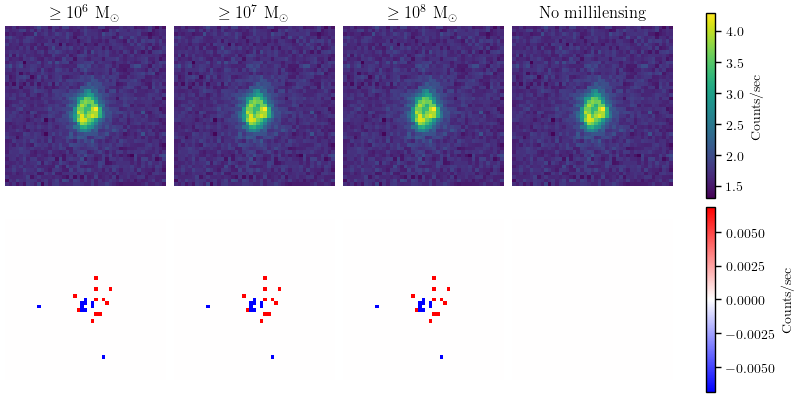

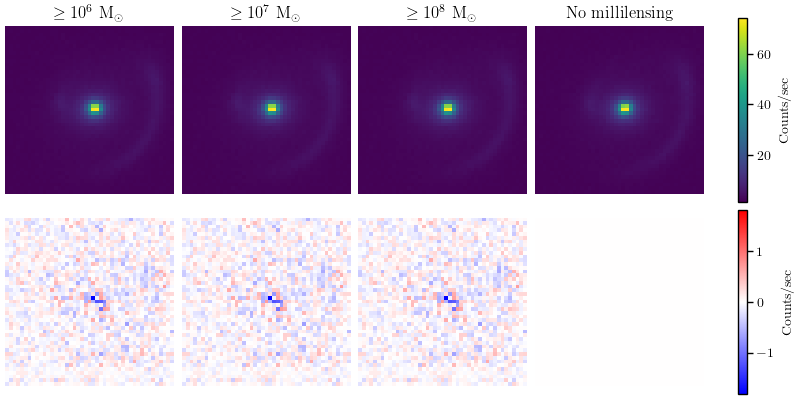

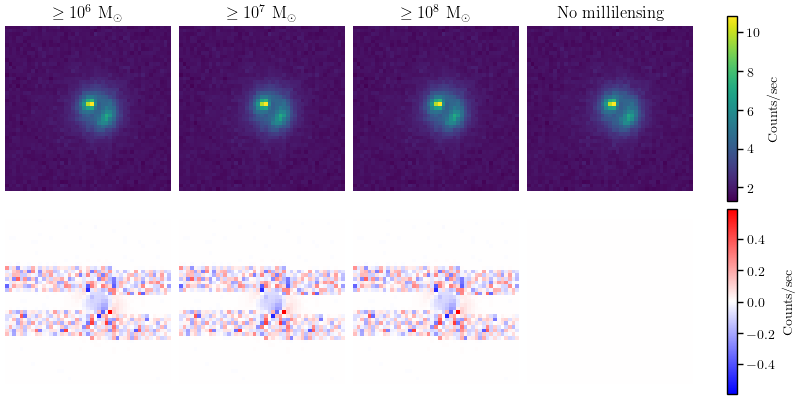

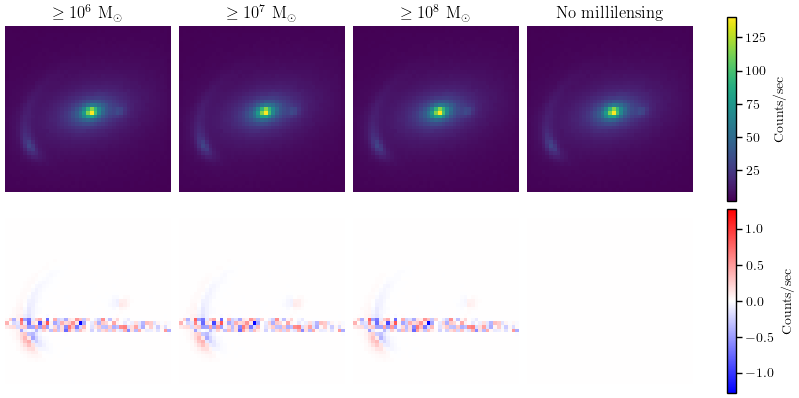

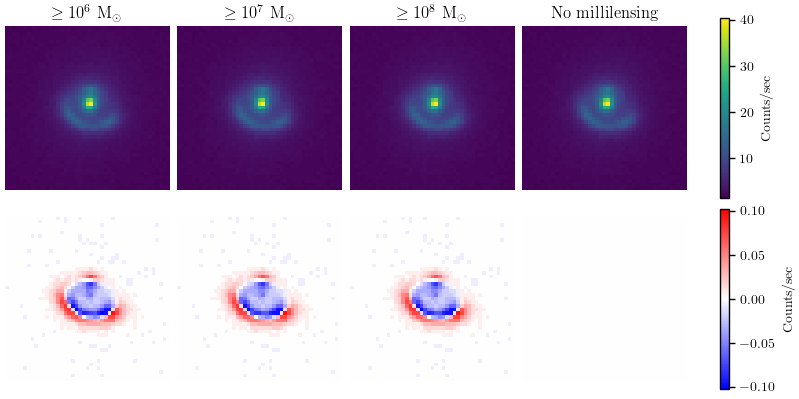

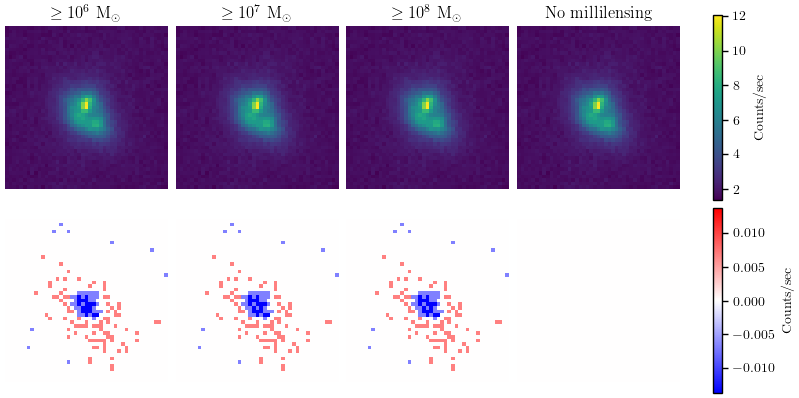

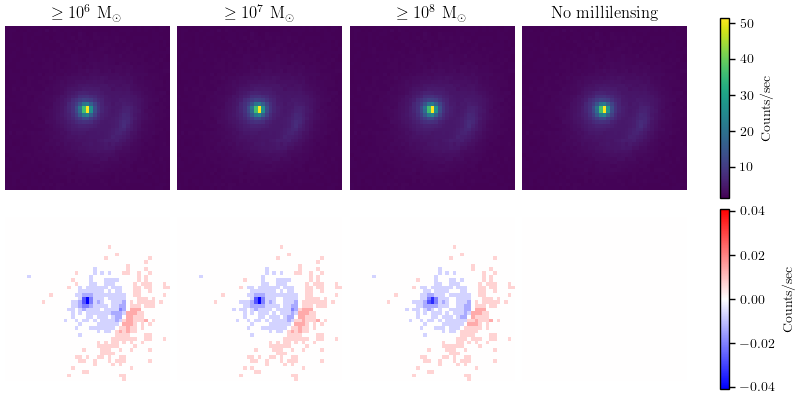

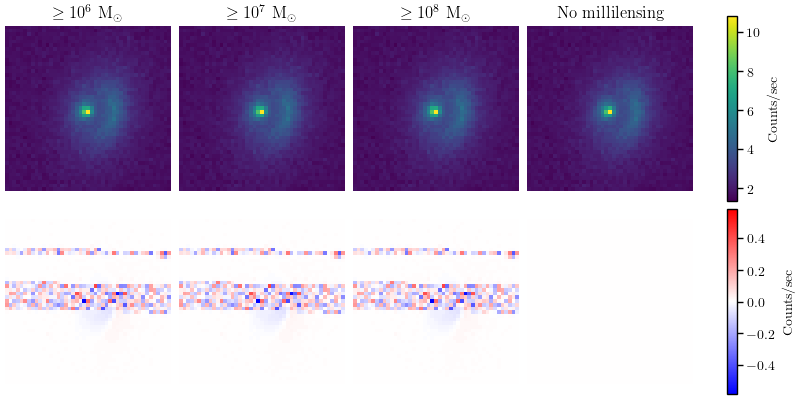

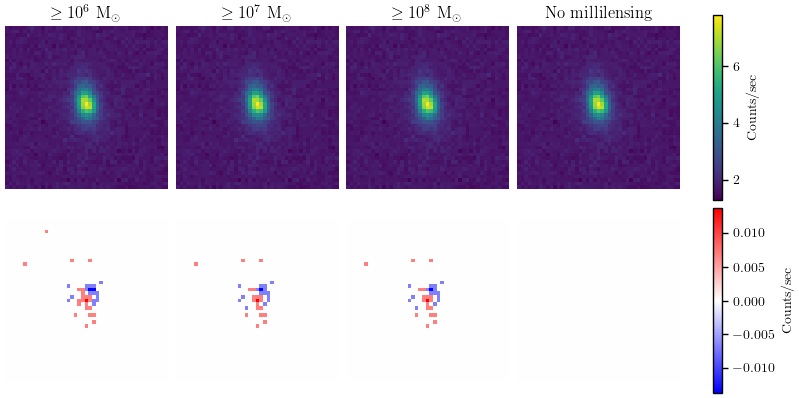

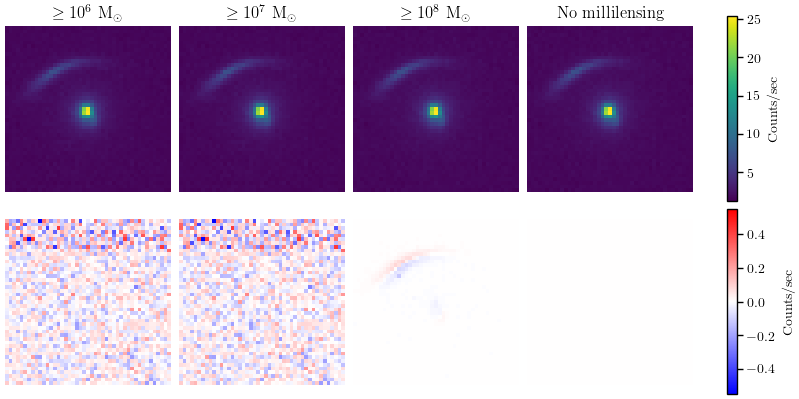

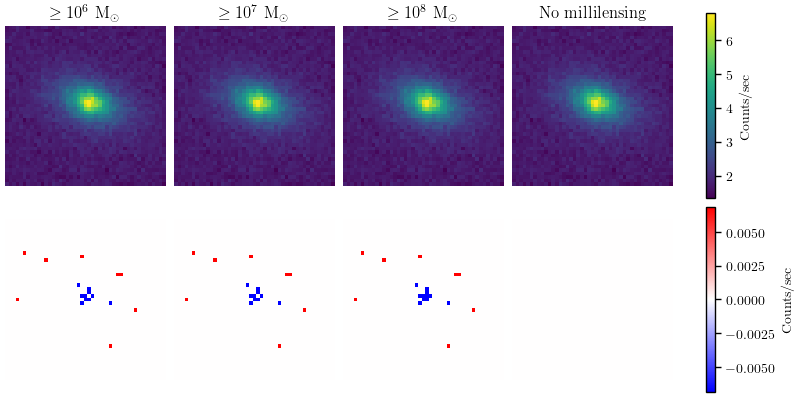

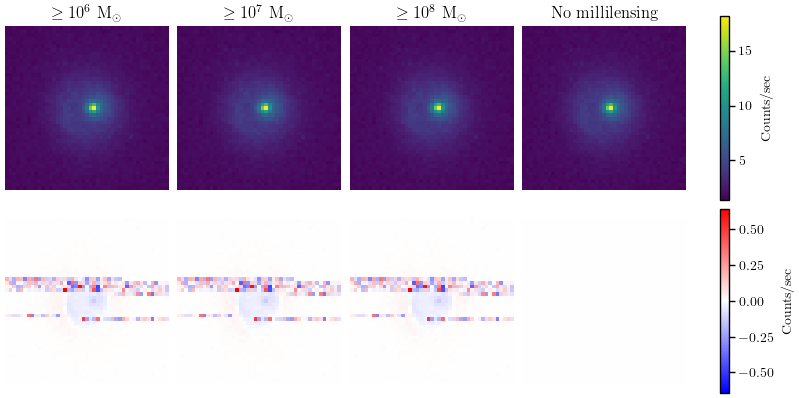

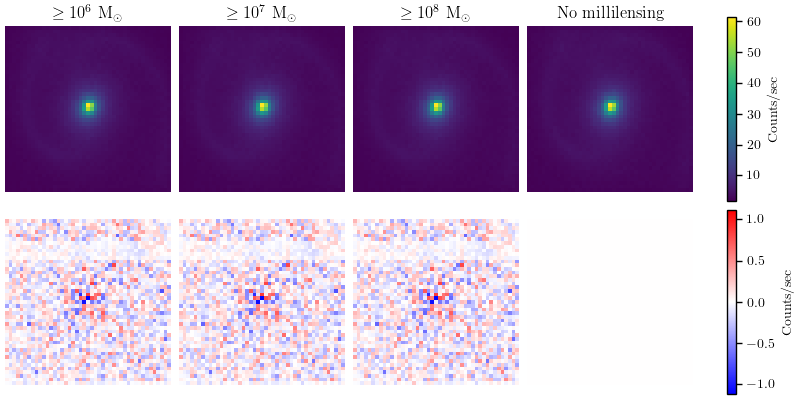

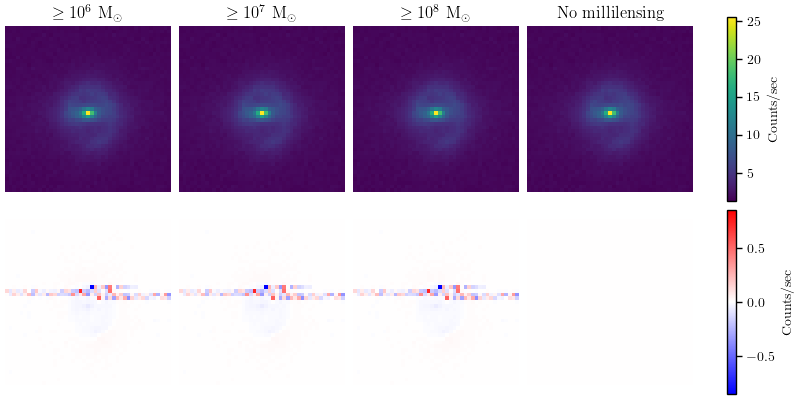

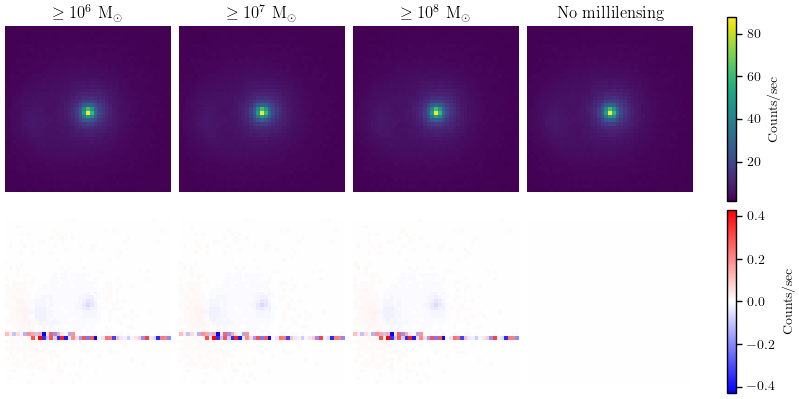

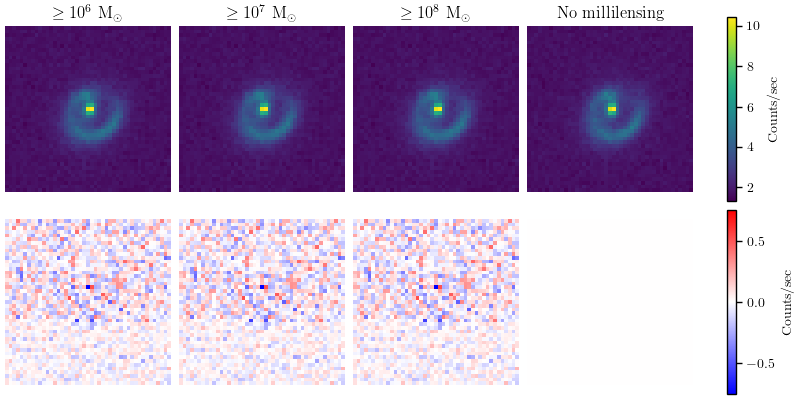

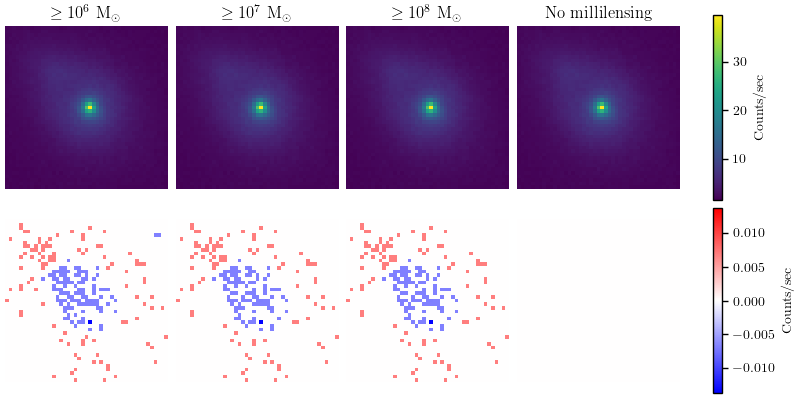

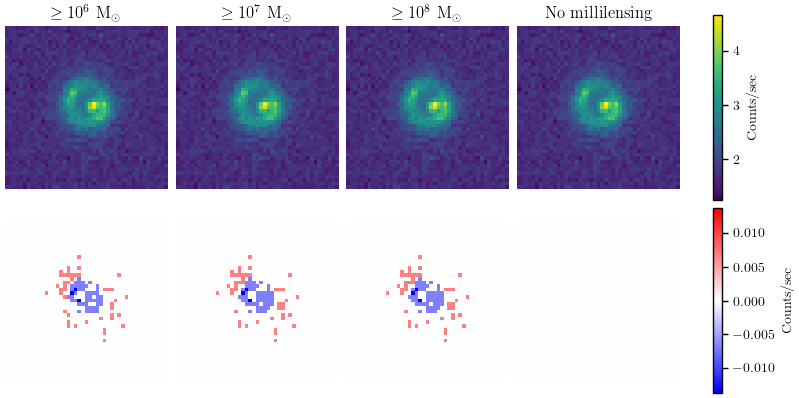

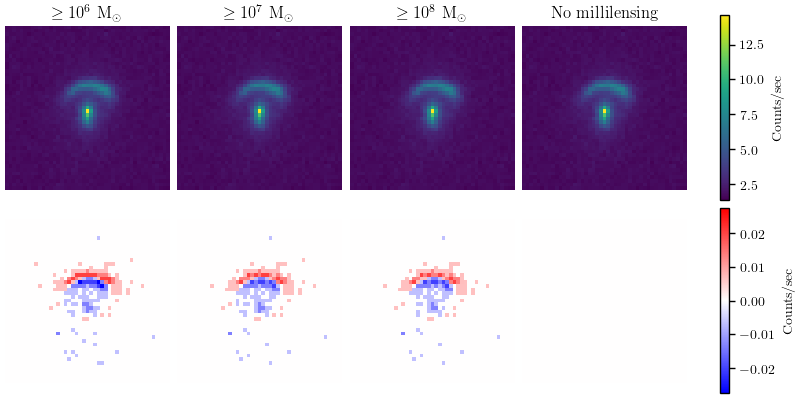

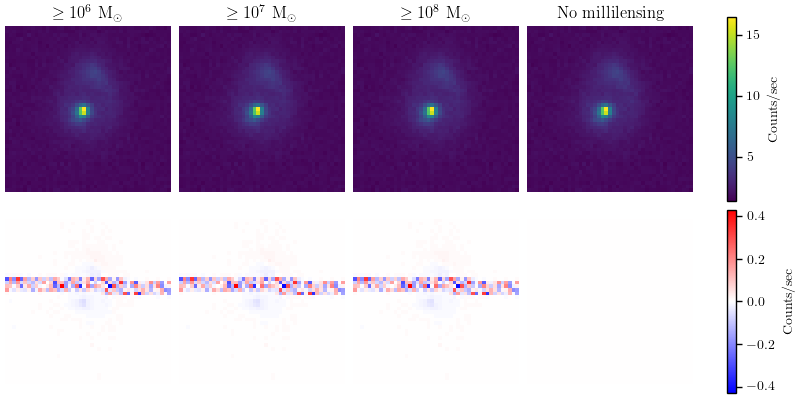

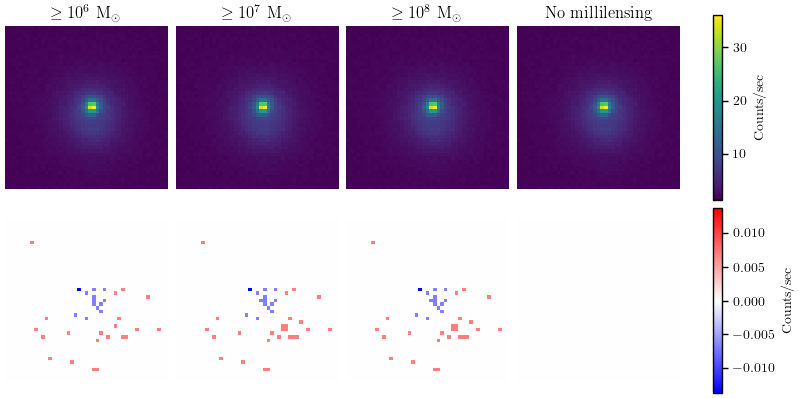

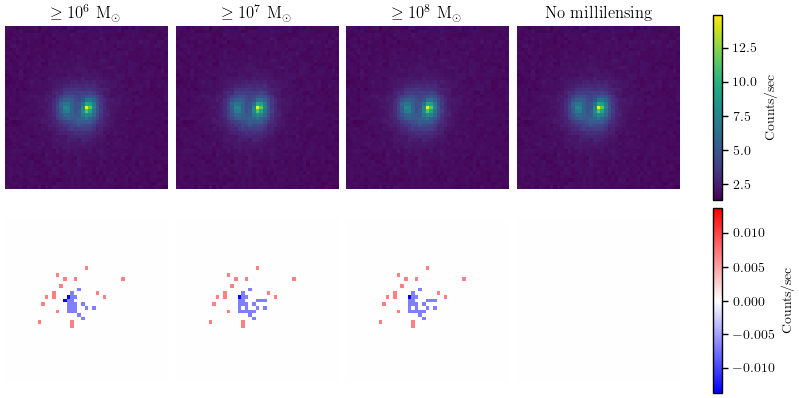

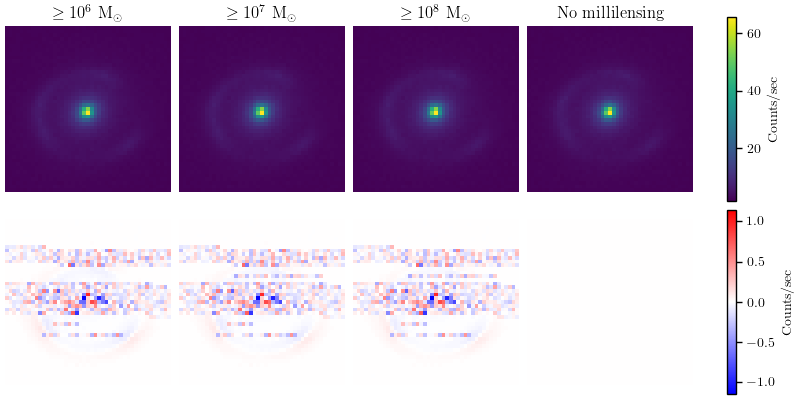

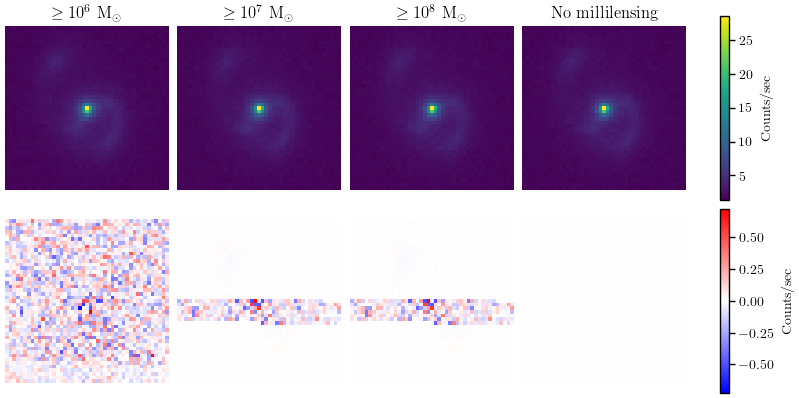

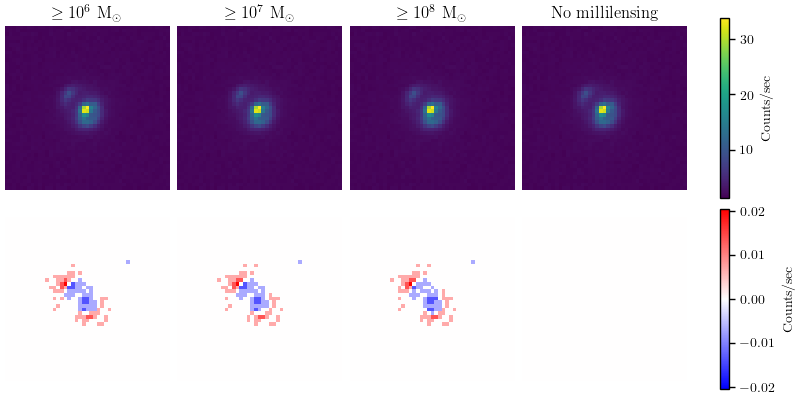

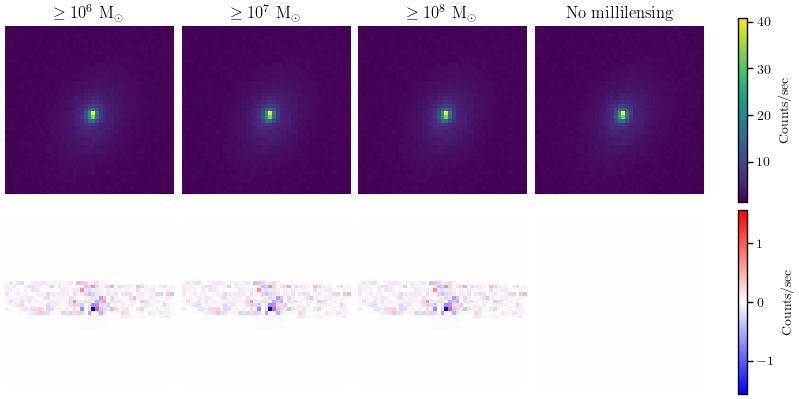

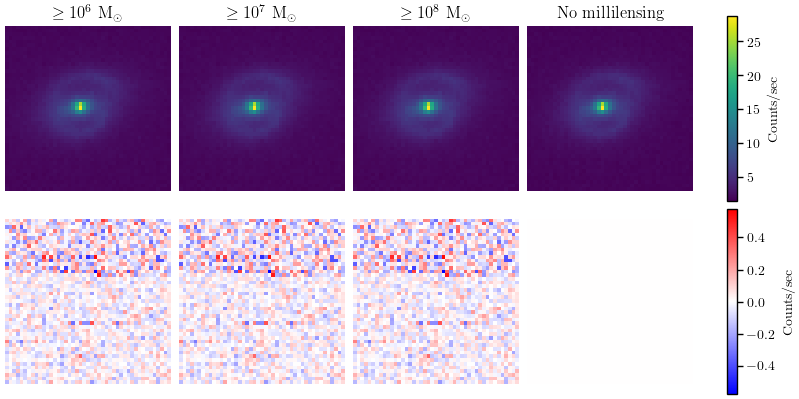

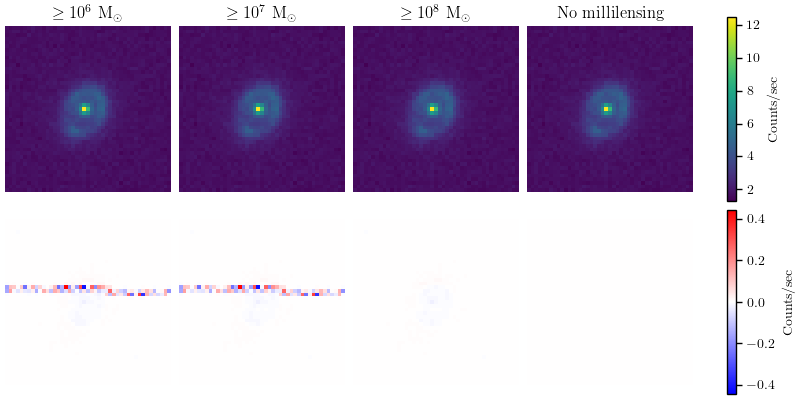

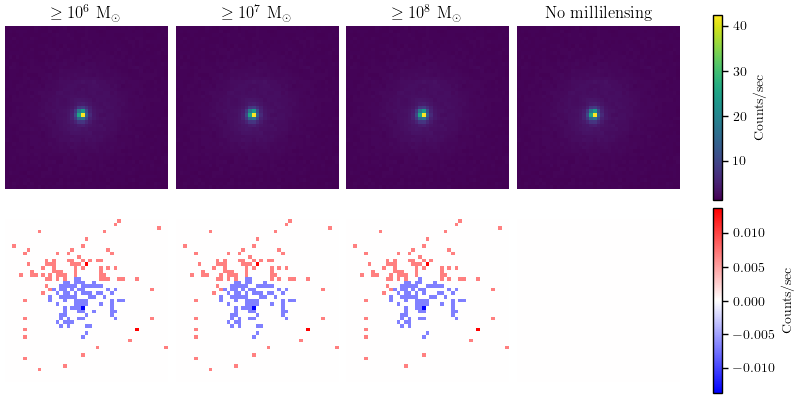

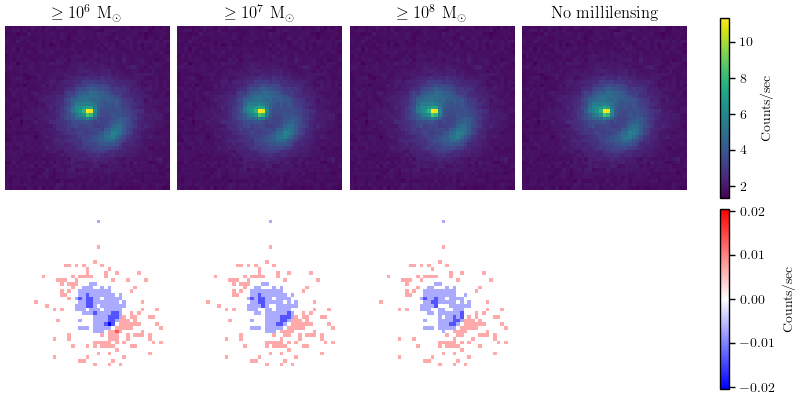

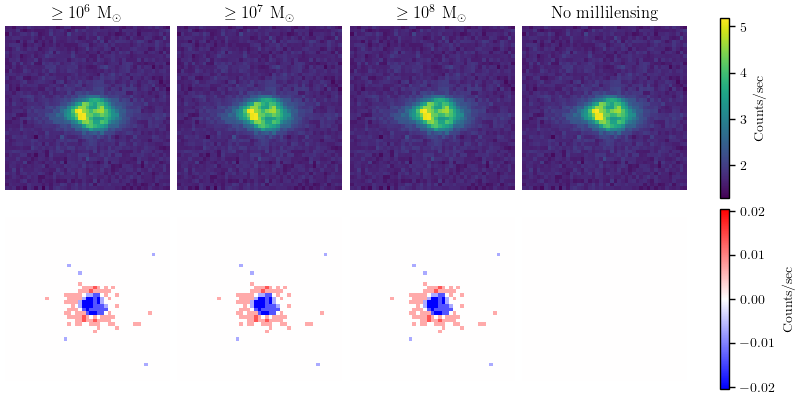

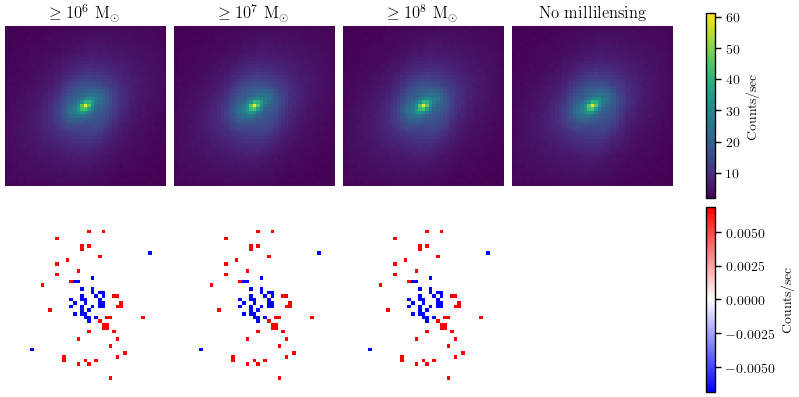

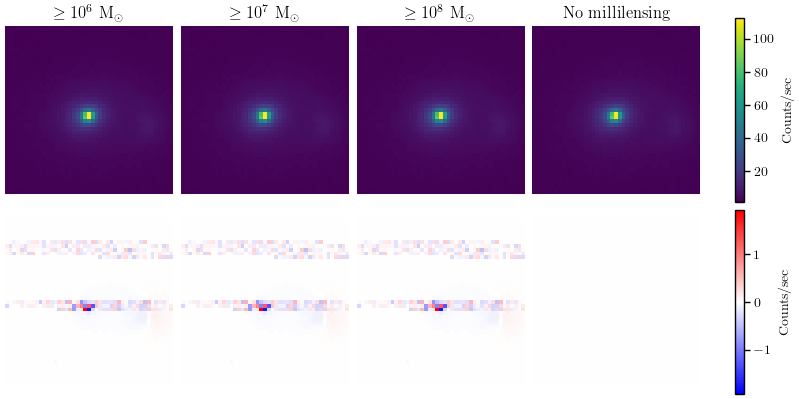

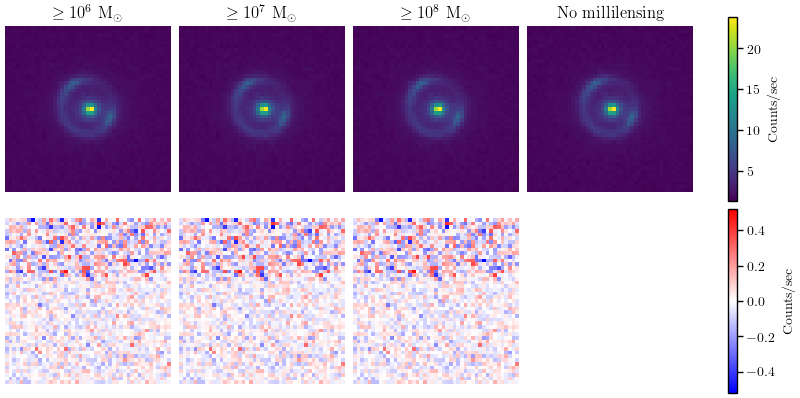

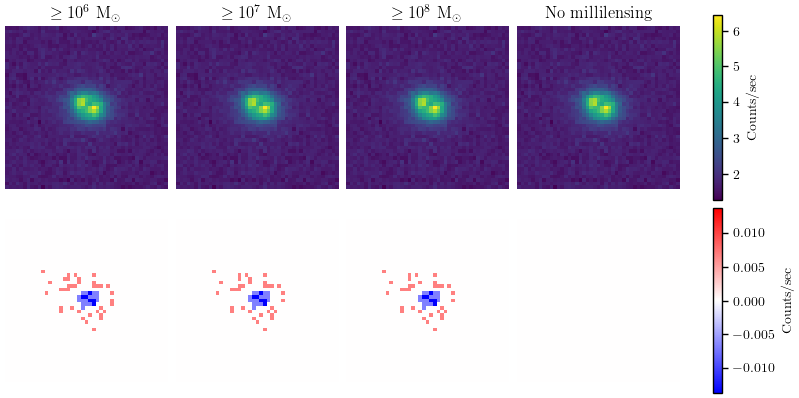

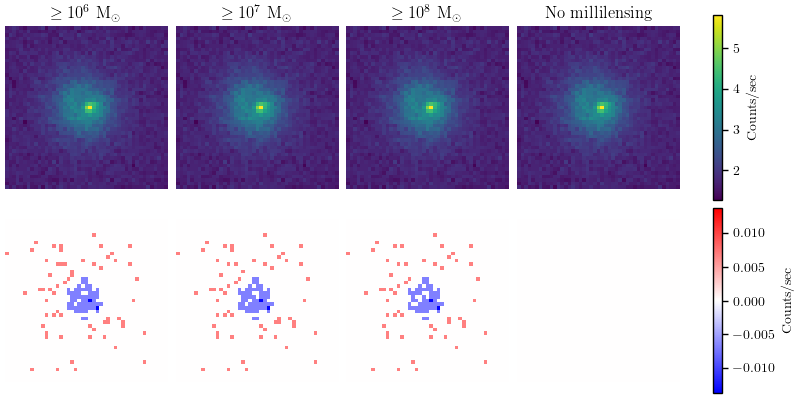

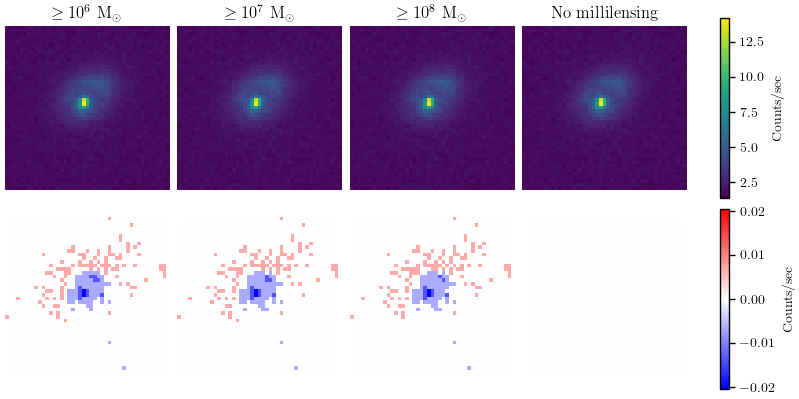

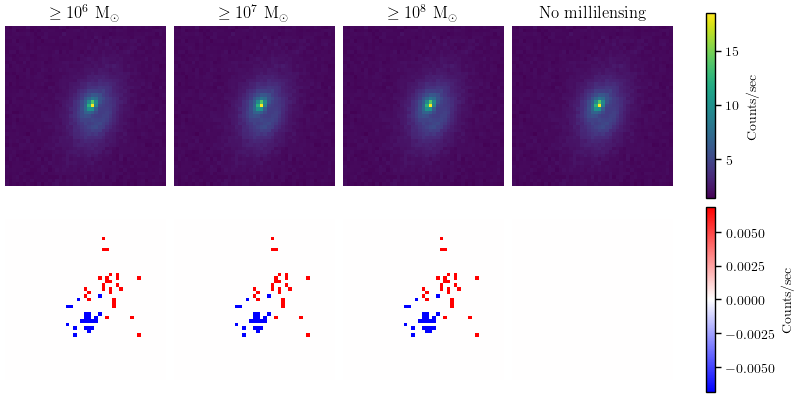

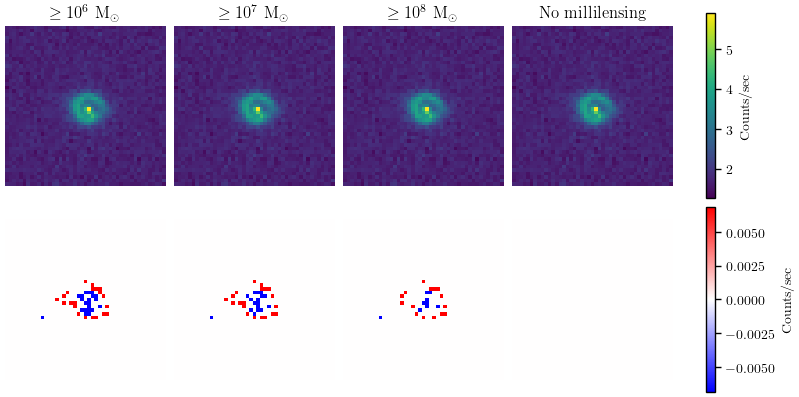

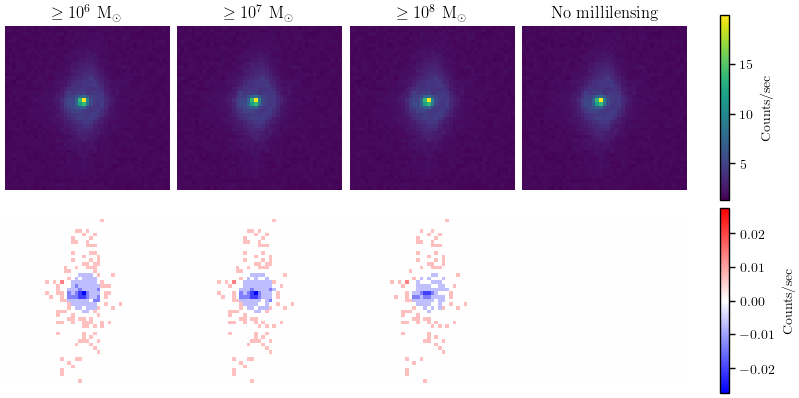

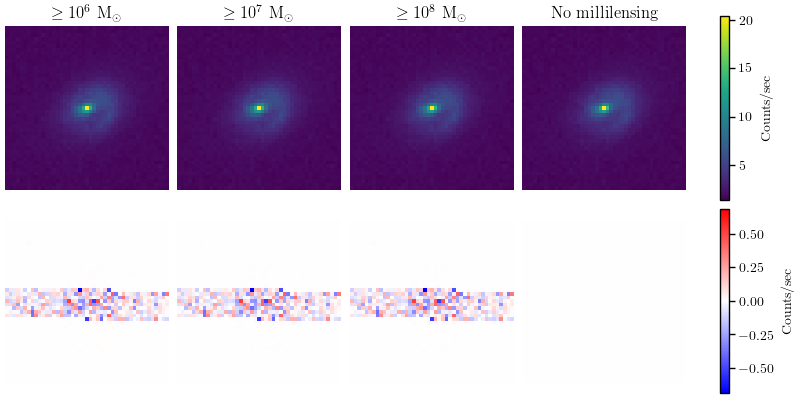

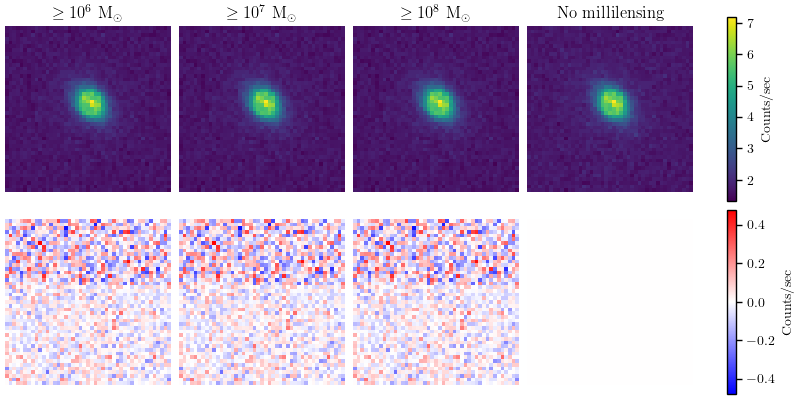

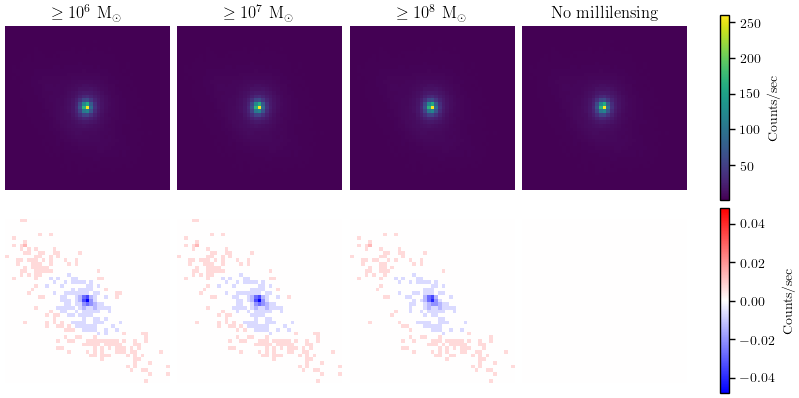

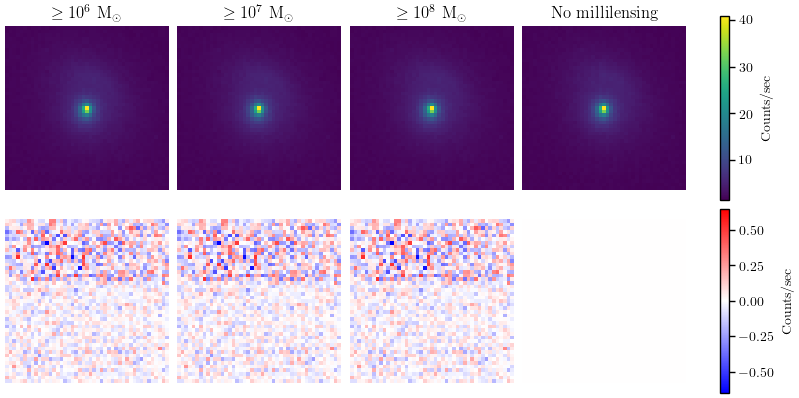

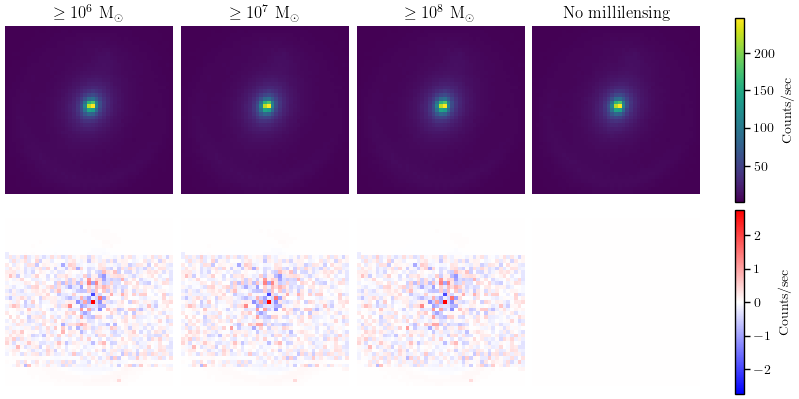

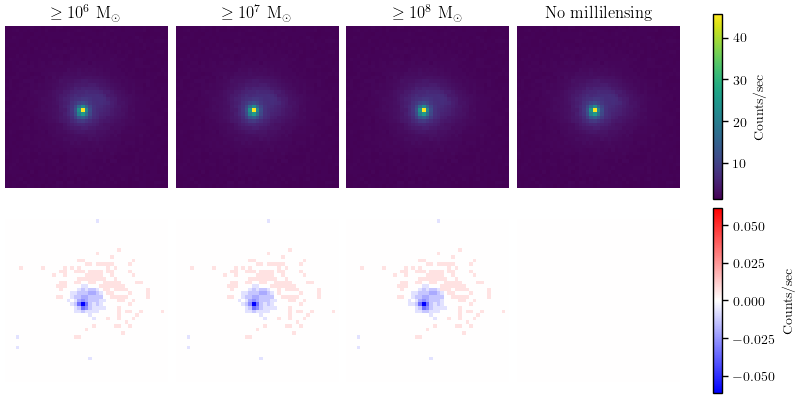

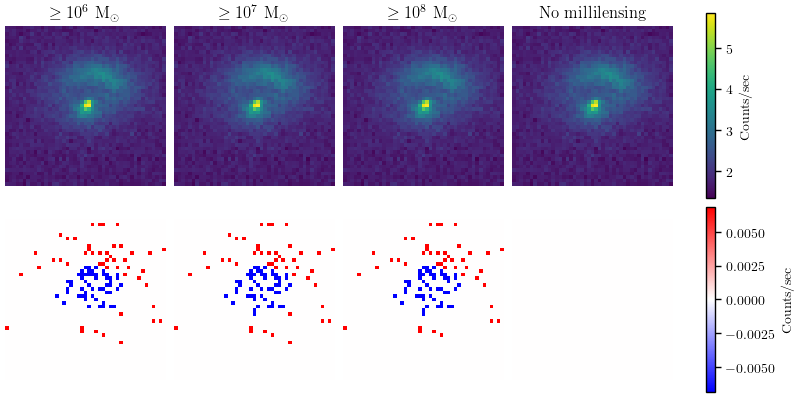

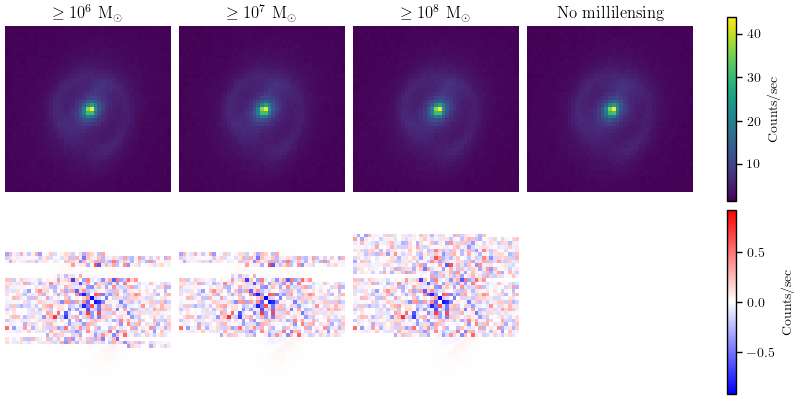

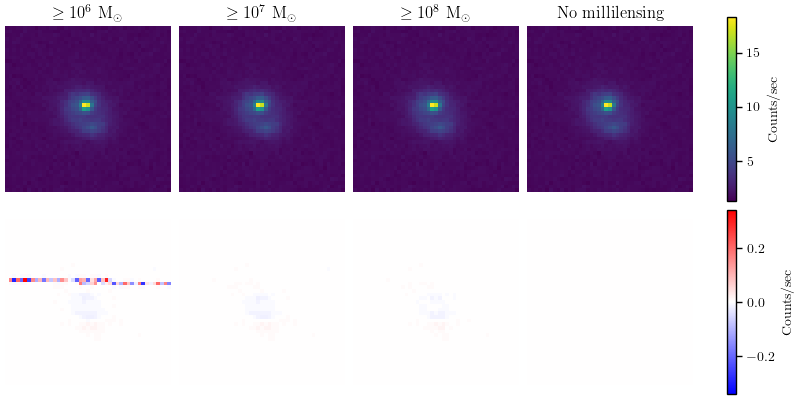

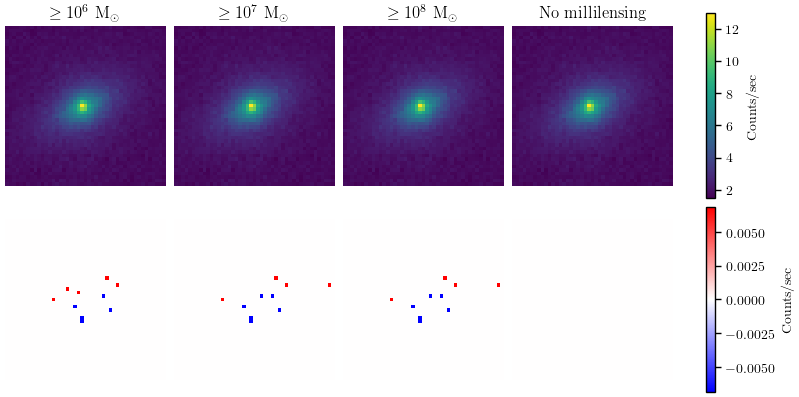

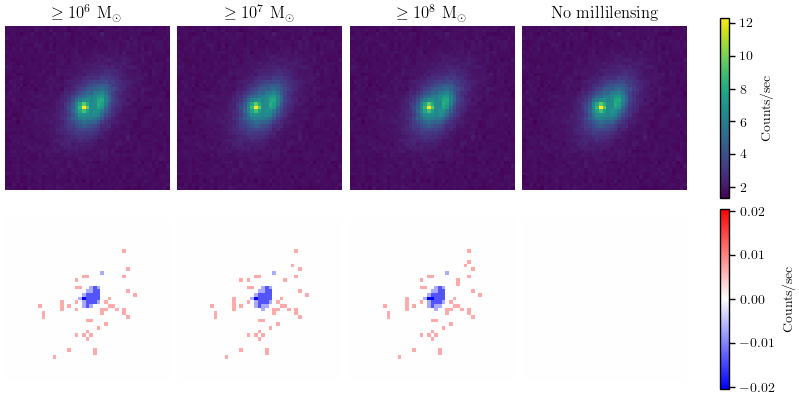

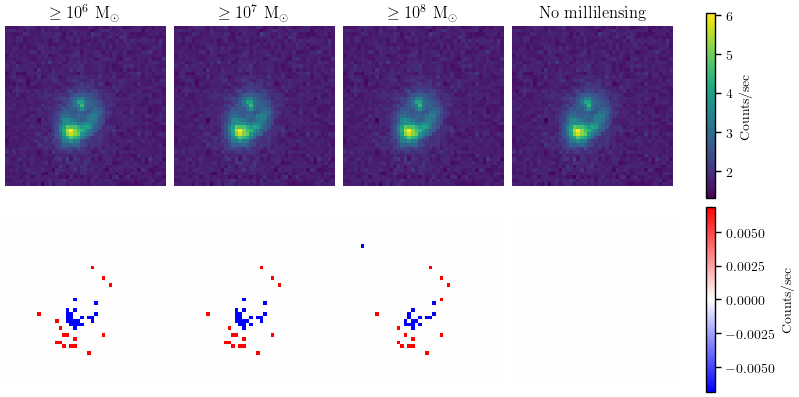

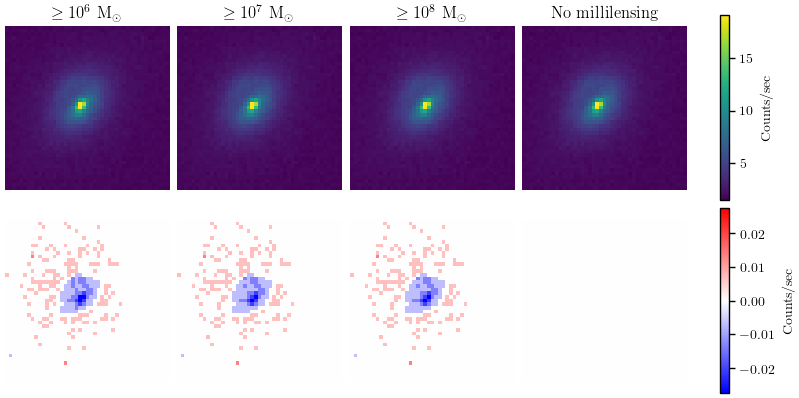

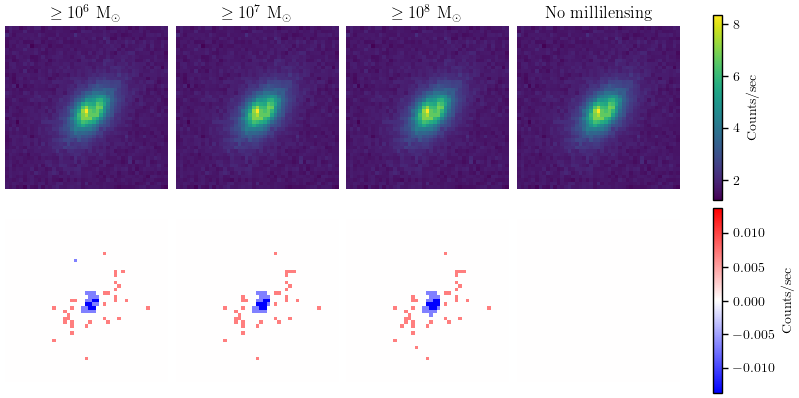

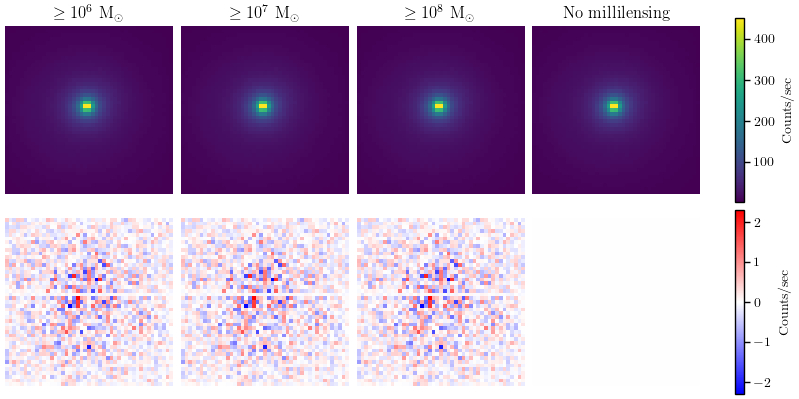

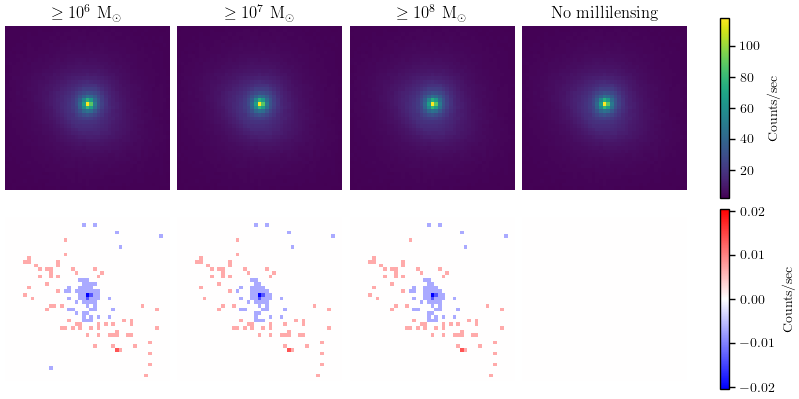

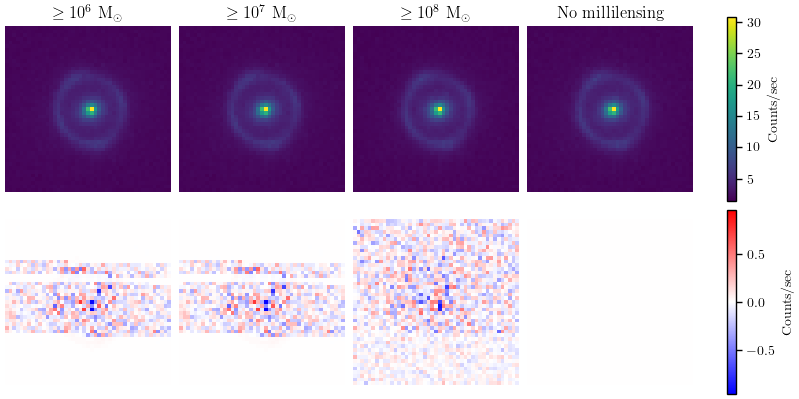

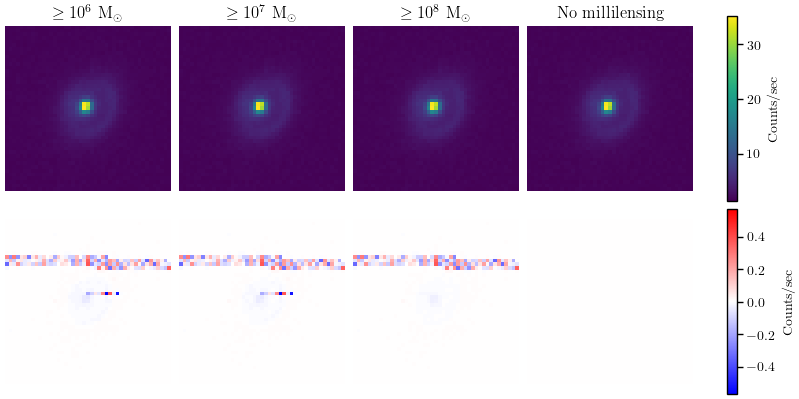

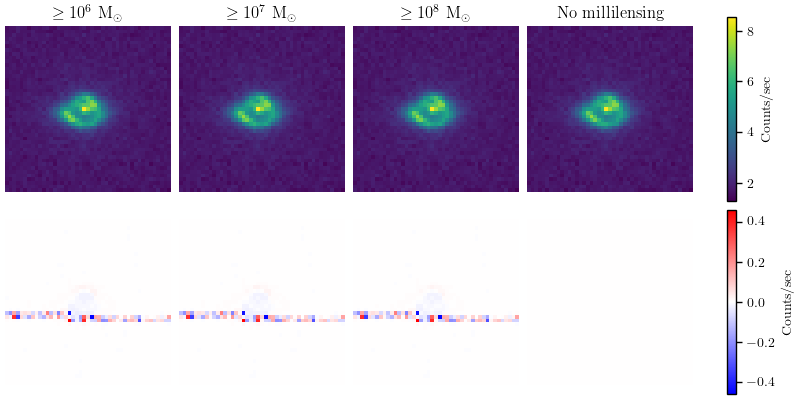

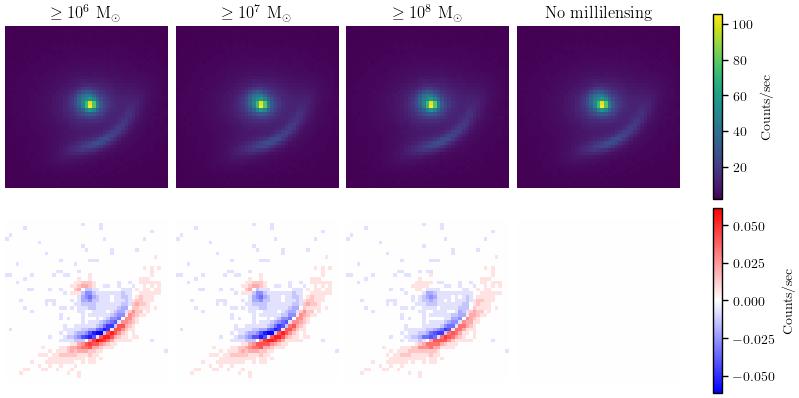

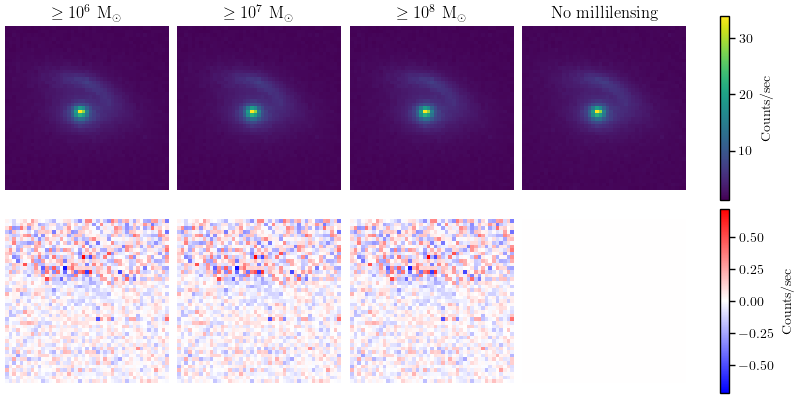

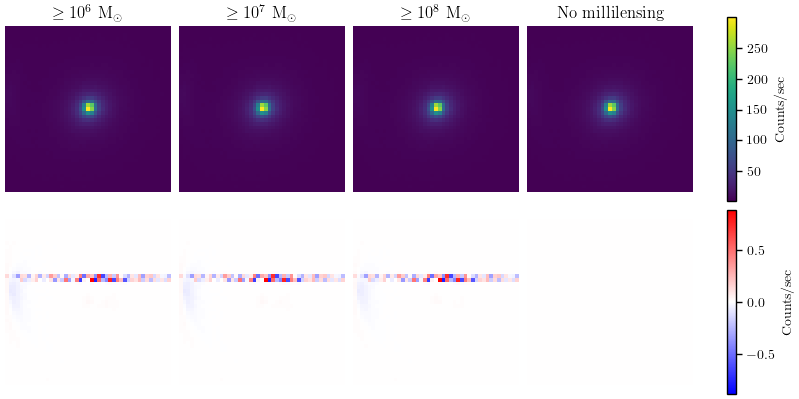

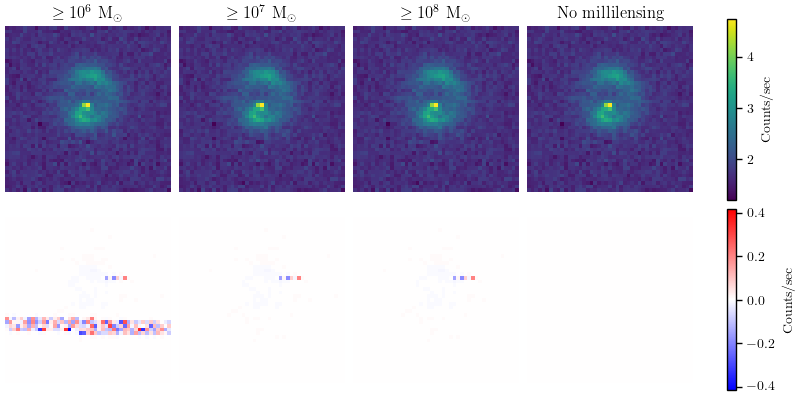

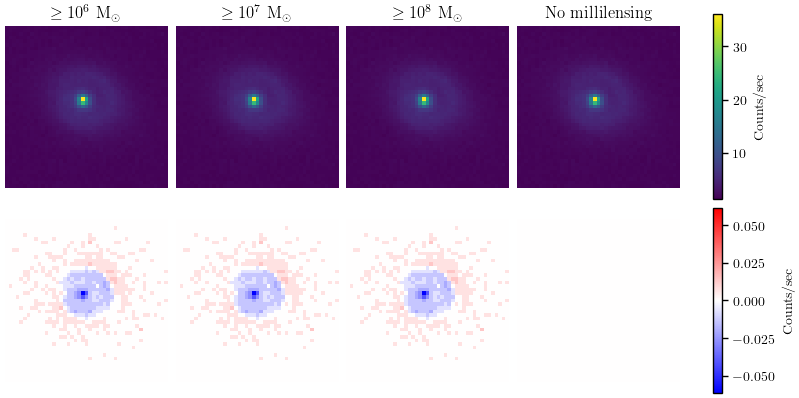

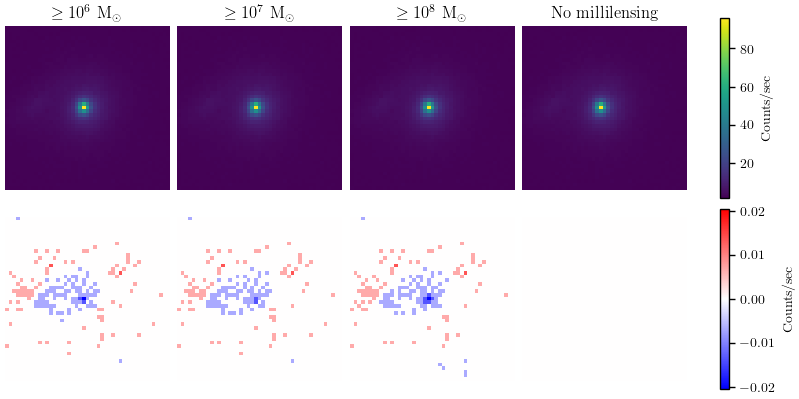

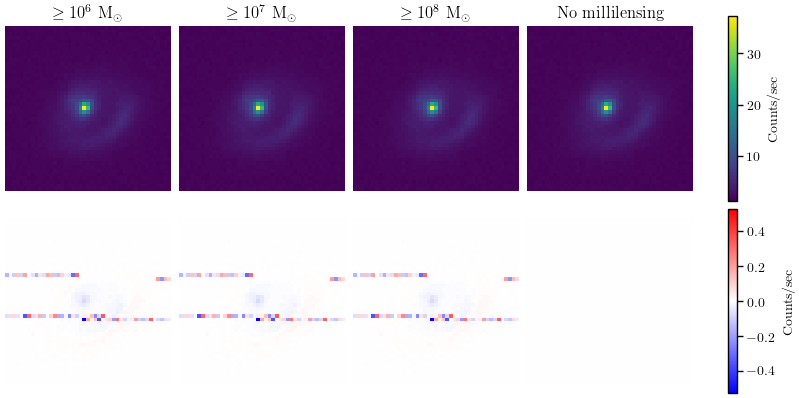

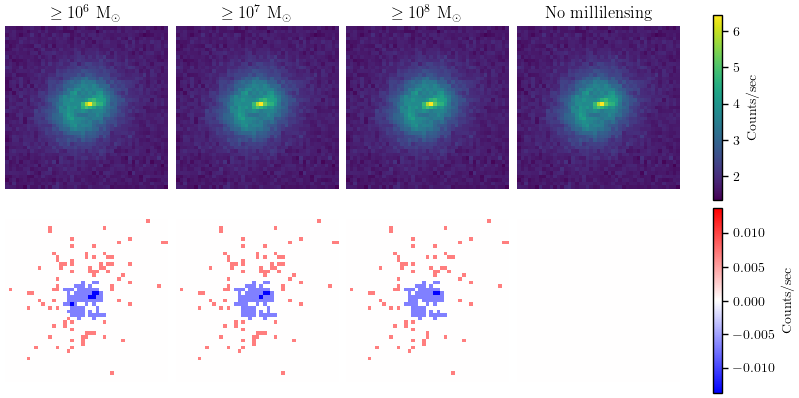

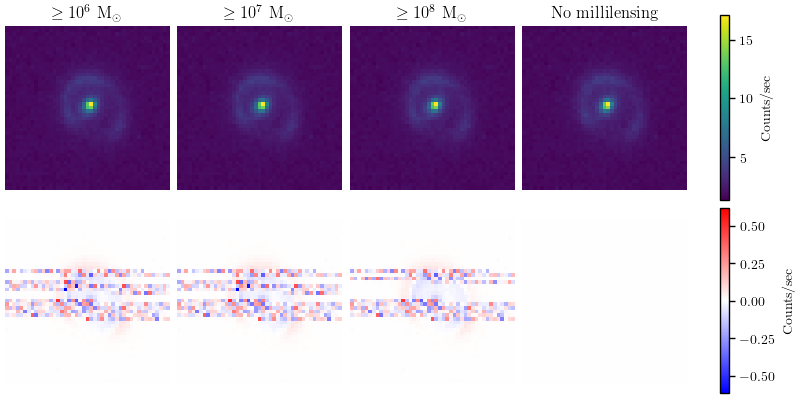

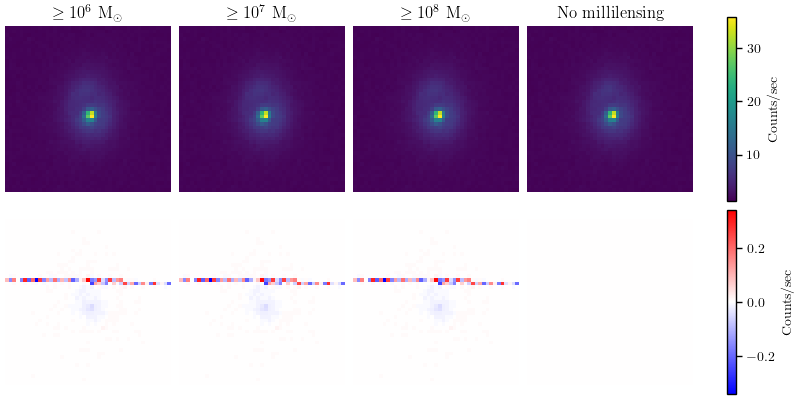

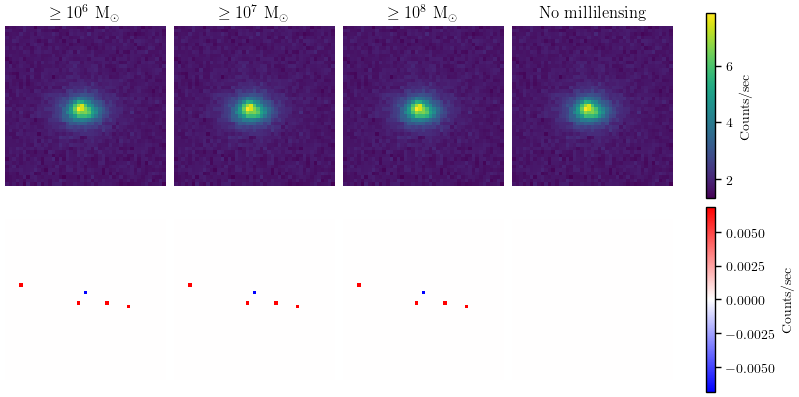

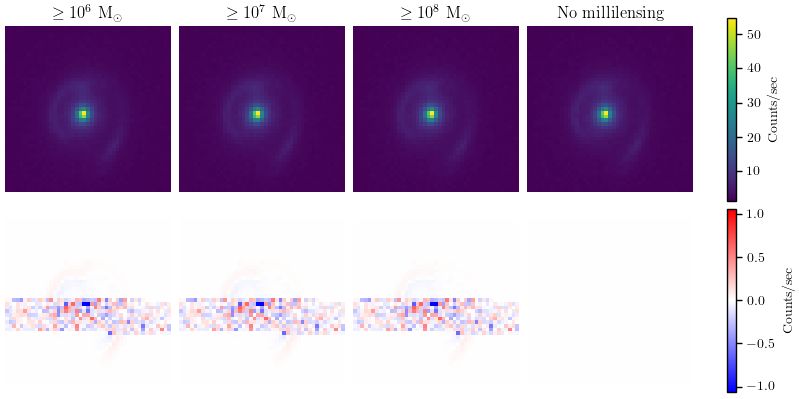

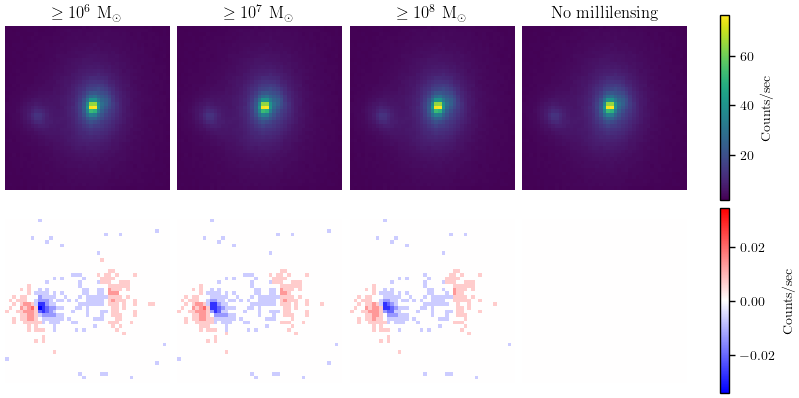

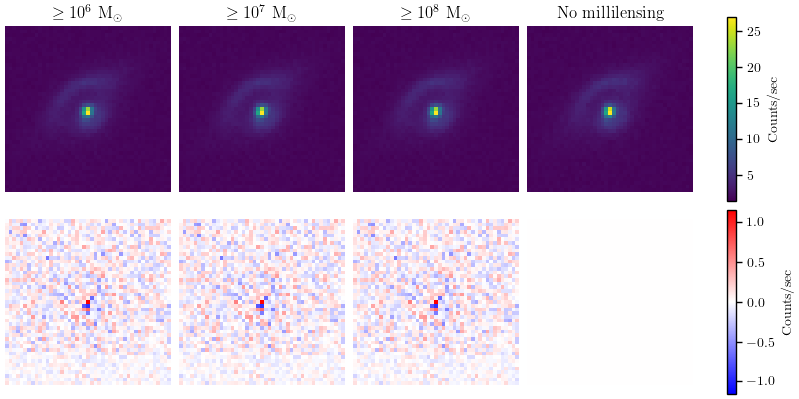

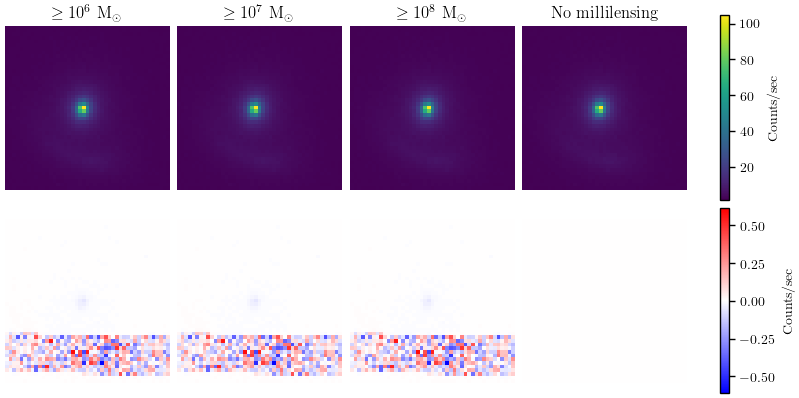

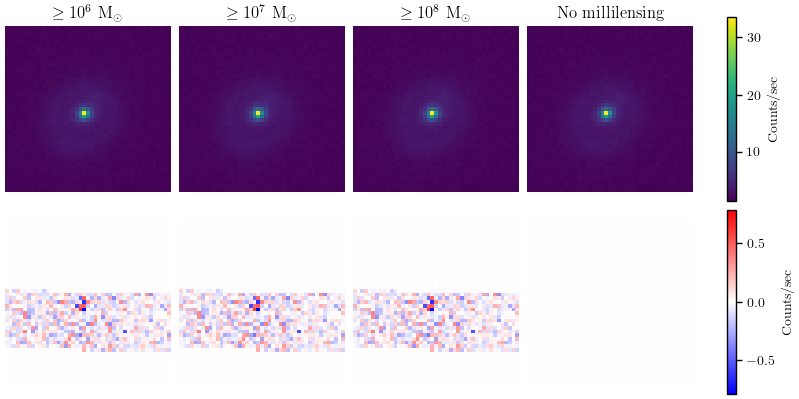

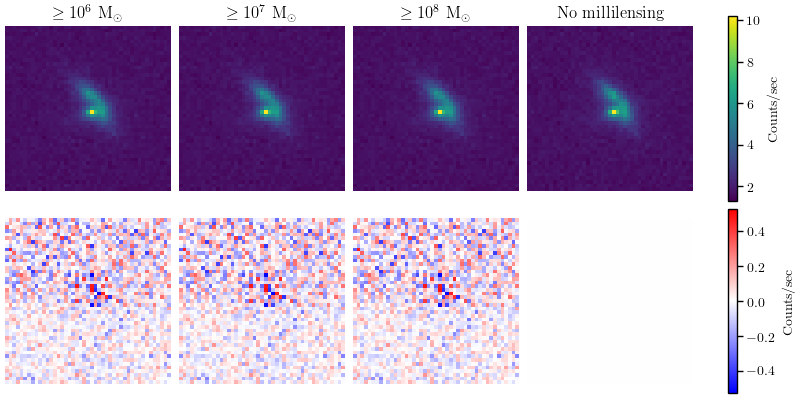

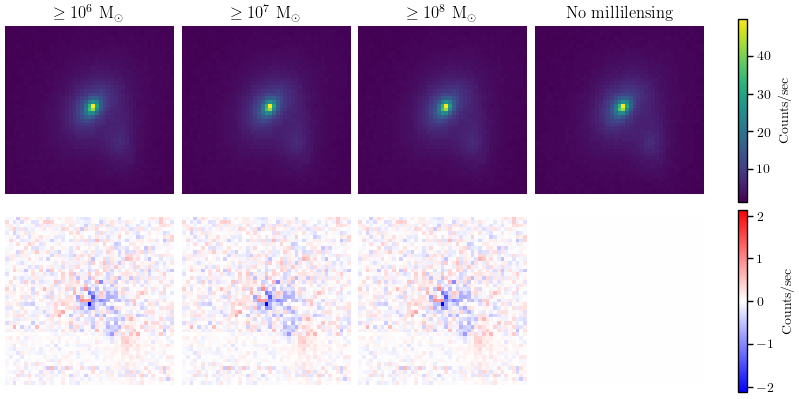

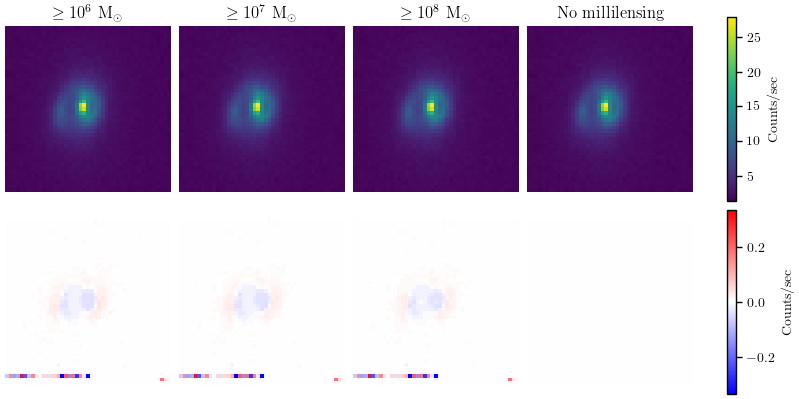

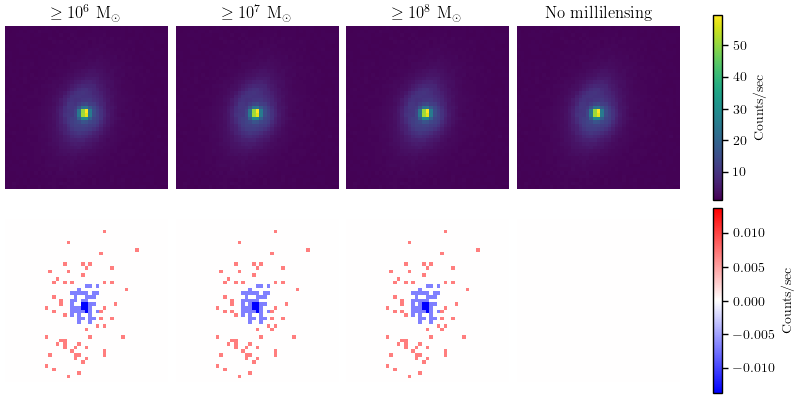

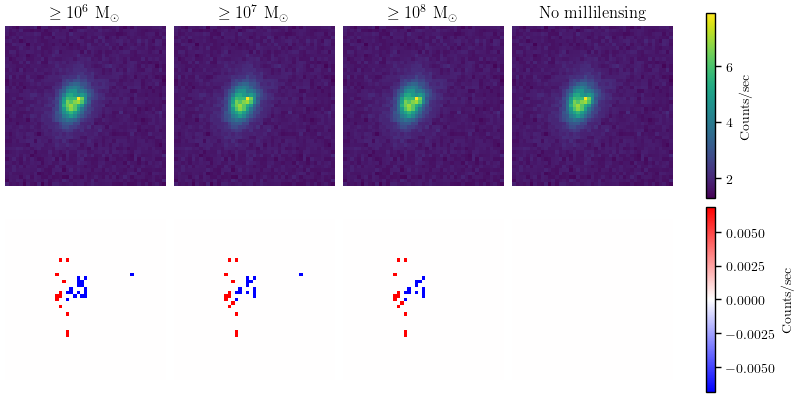

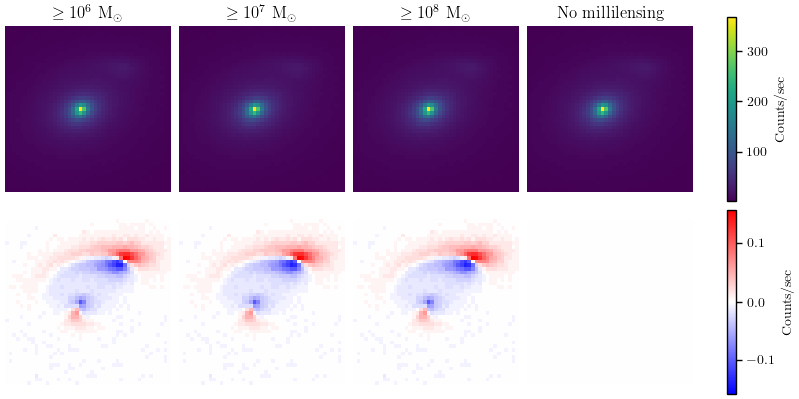

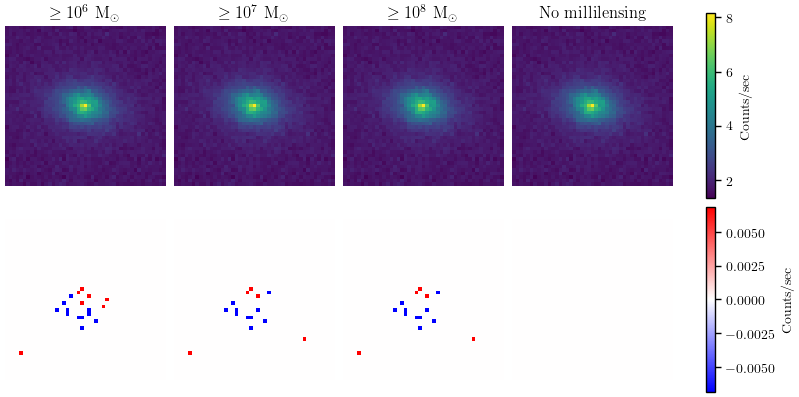

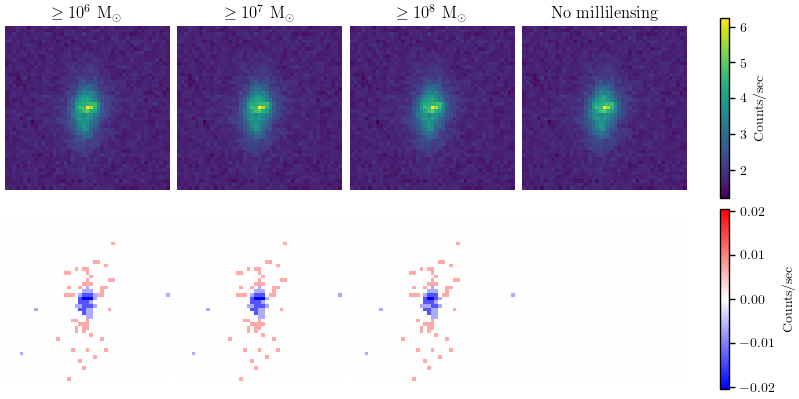

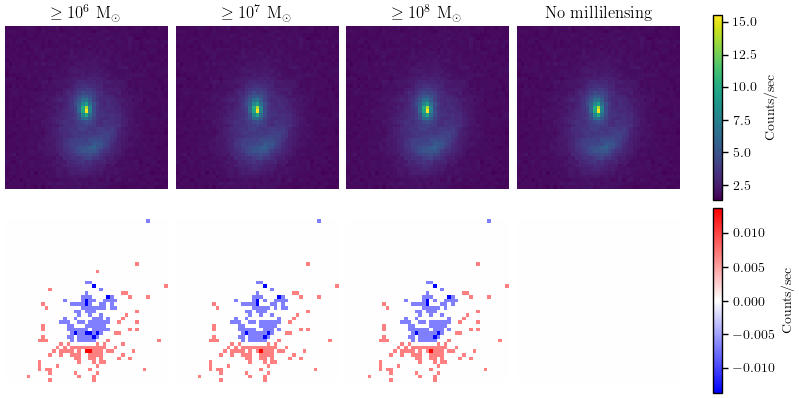

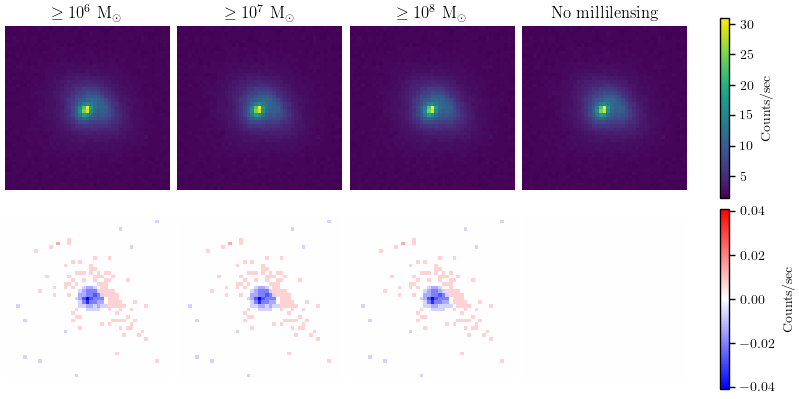

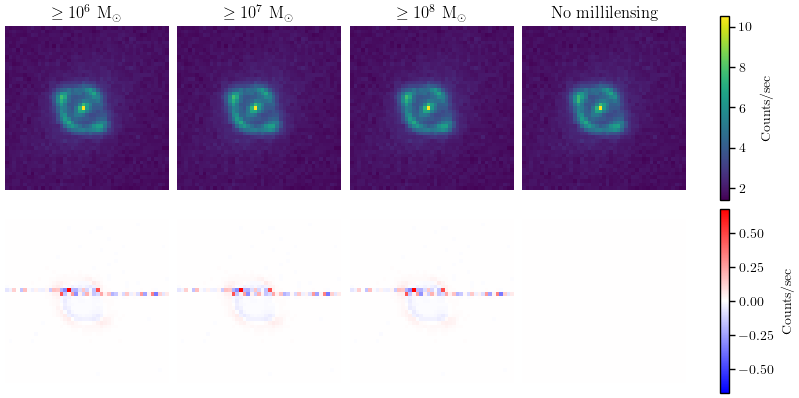

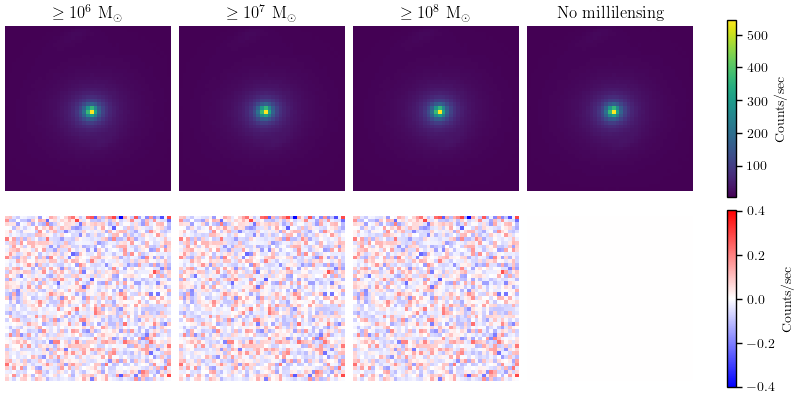

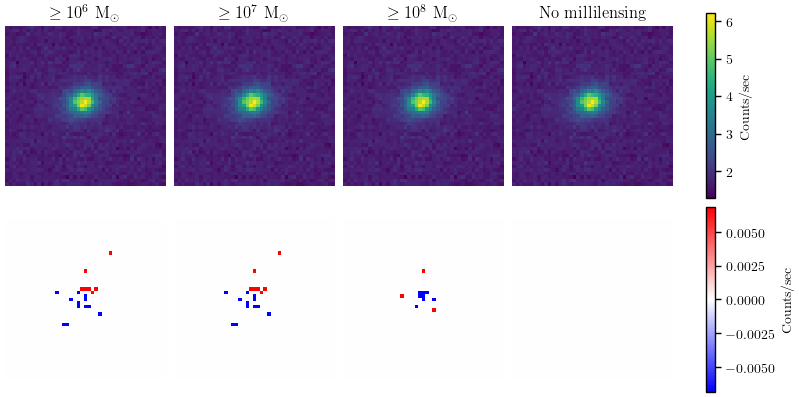

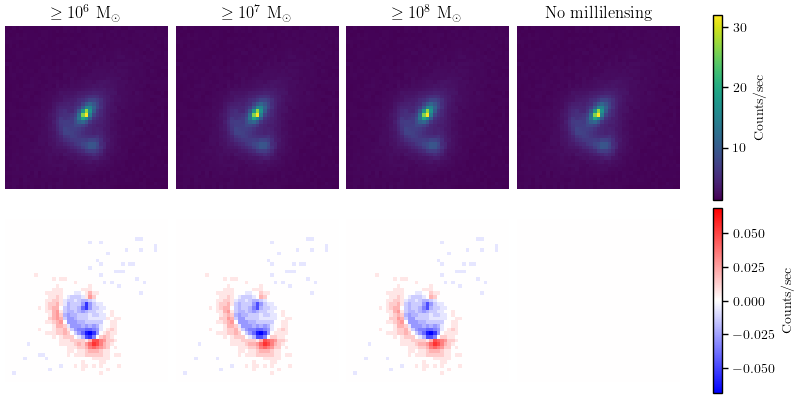

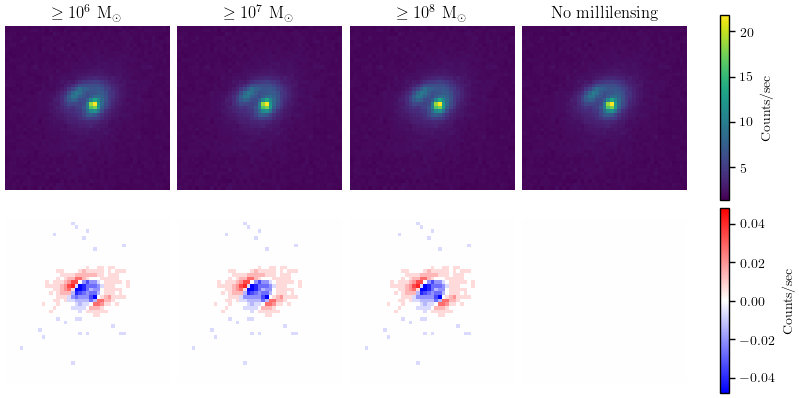

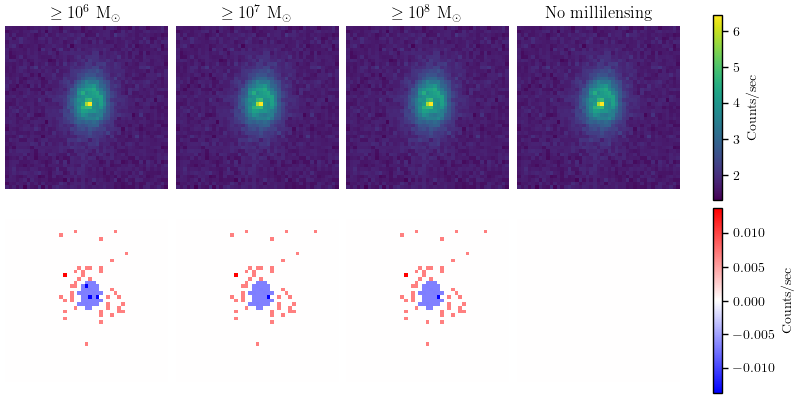

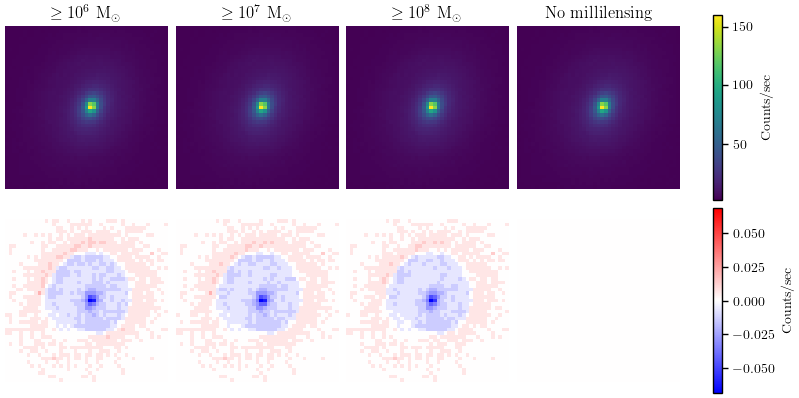

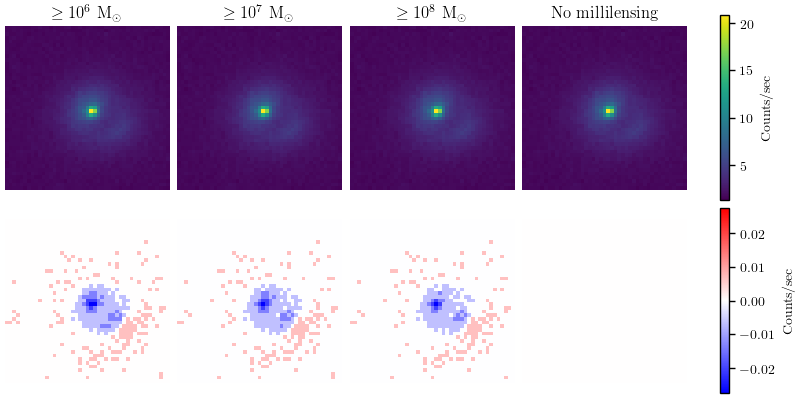

In [7]:
for images in images_list:
    f, ax = plt.subplots(2, 4, figsize=(8, 4), constrained_layout=True)

    res_array = [images[3] - images[i] for i in range(4)]
    v = plot_util.get_v(res_array)

    for i in range(4):
        axis = ax[0][i].imshow(images[i])
        ax[0][i].set_axis_off()

    cbar = f.colorbar(axis, ax=ax[0])
    cbar.set_label('Counts/sec', rotation=90)

    for i in range(4):
        axis = ax[1][i].imshow(images[3] - images[i], cmap='bwr', vmin=-v, vmax=v)
        ax[1][i].set_axis_off()

    cbar = f.colorbar(axis, ax=ax[1])
    cbar.set_label('Counts/sec', rotation=90)

    ax[0][0].set_title('$\geq 10^6$ M$_\odot$')
    ax[0][1].set_title('$\geq 10^7$ M$_\odot$')
    ax[0][2].set_title('$\geq 10^8$ M$_\odot$')
    ax[0][3].set_title('No millilensing')

    # plt.savefig(os.path.join(repo_dir, 'figures', 'artifacts.png'))
    plt.show()

In [30]:
residuals = []

for images in images_list:
    residuals += [images[3] - images[i] for i in range(4)]

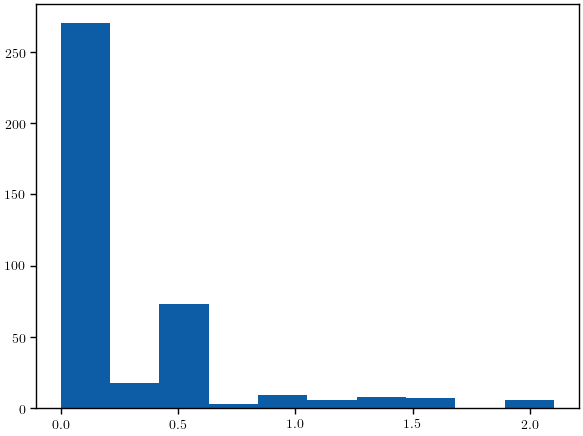

In [31]:
mean_list = [np.max(res) for res in residuals]

plt.hist(mean_list)
plt.show()